In [1]:
import pandas as pd
import numpy as np
import os
base_path = '/Users/freezylex/Documents/course_work/'

### Upload

In [2]:
target_theor = pd.read_excel(os.path.join(base_path, 'data/theor_target.xlsx'), 
                             index_col = 'Date', 
                             parse_dates=True)
target_theor.head(1)

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26217RMFS,SU26218RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS
Date,,,,,,,,,,,,,,,
2015-03-02,0.145507,0.135984,0.146208,0.142918,0.114296,0.14093,0.145273,0.143824,0.143718,0.124295,0.146177,0.139973,0.145992,0.138089,0.121807


In [3]:
target_market = pd.read_excel(os.path.join(base_path, 'data/market_target.xlsx'), 
                             index_col = 'Date', 
                             parse_dates=True)
target_market.head(1)

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26217RMFS,SU26218RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS
Date,,,,,,,,,,,,,,,
2015-03-02,13.840569,13.436397,14.10409,13.638814,13.115709,16.225183,14.616077,13.687301,15.185467,13.245579,14.174794,13.531775,13.943358,13.48255,13.21098


### Check for equality of indexes and columns

In [4]:
(target_theor.columns == target_market.columns).all()

True

In [5]:
target_market.shape, target_theor.shape

((239, 15), (245, 15))

In [6]:
len(set(target_market.index.values) & set(target_theor.index.values)) #Union of dates available for both
#dataframes

238

In [7]:
possible_dates = list(set(target_market.index) & set(target_theor.index))
target_theor = target_theor.loc[possible_dates].sort_index()
target_theor.head(2)

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26217RMFS,SU26218RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS
Date,,,,,,,,,,,,,,,
2015-03-02,0.145507,0.135984,0.146208,0.142918,0.114296,0.140930,0.145273,0.143824,0.143718,0.124295,0.146177,0.139973,0.145992,0.138089,0.121807
2015-03-03,0.137546,0.129825,0.139080,0.134939,0.112495,0.136228,0.139801,0.135735,0.139331,0.121197,0.139295,0.132655,0.138320,0.131303,0.119147


In [8]:
target_market = target_market.loc[possible_dates].sort_index()
target_market /= 100
target_market.head(2)

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26217RMFS,SU26218RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS
Date,,,,,,,,,,,,,,,
2015-03-02,0.138406,0.134364,0.141041,0.136388,0.131157,0.162252,0.146161,0.136873,0.151855,0.132456,0.141748,0.135318,0.139434,0.134825,0.13211
2015-03-03,0.138271,0.134330,0.140877,0.136298,0.131215,0.162547,0.146041,0.136771,0.151879,0.132476,0.141582,0.135257,0.139283,0.134778,0.13214


# Make target

In [9]:
true_target = target_market - target_theor
true_target = true_target * 10000
true_target.head(2)

,SU26214RMFS,SU26215RMFS,SU26216RMFS,SU26217RMFS,SU26218RMFS,SU26203RMFS,SU26204RMFS,SU26205RMFS,SU26206RMFS,SU26207RMFS,SU26208RMFS,SU26209RMFS,SU26210RMFS,SU26211RMFS,SU26212RMFS
Date,,,,,,,,,,,,,,,
2015-03-02,-71.009402,-16.198293,-51.672678,-65.301386,168.611126,213.214039,8.877833,-69.514138,81.363229,81.611366,-44.294101,-46.555882,-65.581271,-32.632524,103.025743
2015-03-03,7.255880,45.041981,17.967756,13.595885,187.203454,263.188637,62.406383,10.363783,125.481830,112.795674,22.874165,26.012453,9.625523,34.752162,129.932953


In [21]:
true_target.loc['2015-06':].shape

(178, 15)

In [10]:
true_target.to_excel(os.path.join(base_path, 'data/final_target.xlsx'))

In [11]:
true_target.columns = ['OFZ ' + x[2:-4] for x in true_target.columns]

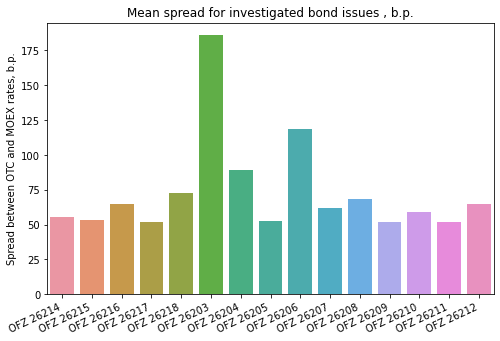

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x = true_target.loc['2015-06':].mean().index, y = true_target.loc['2015-06':].mean().values)
plt.xticks(rotation=25, ha='right')
plt.ylabel('Spread between OTC and MOEX rates, b.p.')
plt.title('Mean spread for investigated bond issues , b.p.')
plt.savefig(os.path.join(base_path, 'graphs/mean_spread_by_issues.png'), dpi=300)
plt.show()

In [25]:
true_target.loc['2015-06':].describe()

,OFZ 26214,OFZ 26215,OFZ 26216,OFZ 26217,OFZ 26218,OFZ 26203,OFZ 26204,OFZ 26205,OFZ 26206,OFZ 26207,OFZ 26208,OFZ 26209,OFZ 26210,OFZ 26211,OFZ 26212
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,55.530287,53.051166,65.048387,51.825080,72.700788,185.776222,89.298385,52.347943,118.464853,62.112601,68.145921,51.675948,58.754828,52.173639,64.685545
std,36.314598,36.328886,35.894092,36.638864,47.632930,40.364948,35.565951,36.592161,35.894402,34.332928,35.829742,36.594977,36.117073,36.488937,34.240894
min,-40.150569,-49.018731,-24.975765,-47.884920,-121.821133,118.544375,5.066848,-46.542860,47.924774,-33.710825,-20.815109,-49.574758,-34.506698,-49.625008,-27.017507
25%,32.461554,28.792333,43.133323,30.198153,53.591988,155.558316,67.482016,30.339627,90.903571,40.673116,46.847828,28.824272,35.989620,28.734644,44.173296
50%,51.532357,53.656101,61.259561,51.359779,80.760339,173.271071,85.639929,50.654136,115.605624,59.724306,65.471810,51.528086,55.200890,52.597118,63.224960
75%,83.403537,84.654519,89.787151,82.685010,100.524240,207.648092,112.021395,82.419460,145.962651,86.880795,91.816091,84.307448,85.337618,84.750468,86.136227
max,134.085021,122.784805,142.268309,129.756902,186.468544,277.108156,169.758432,130.848444,196.211279,126.044313,146.356588,126.720132,136.578660,124.867228,133.775439


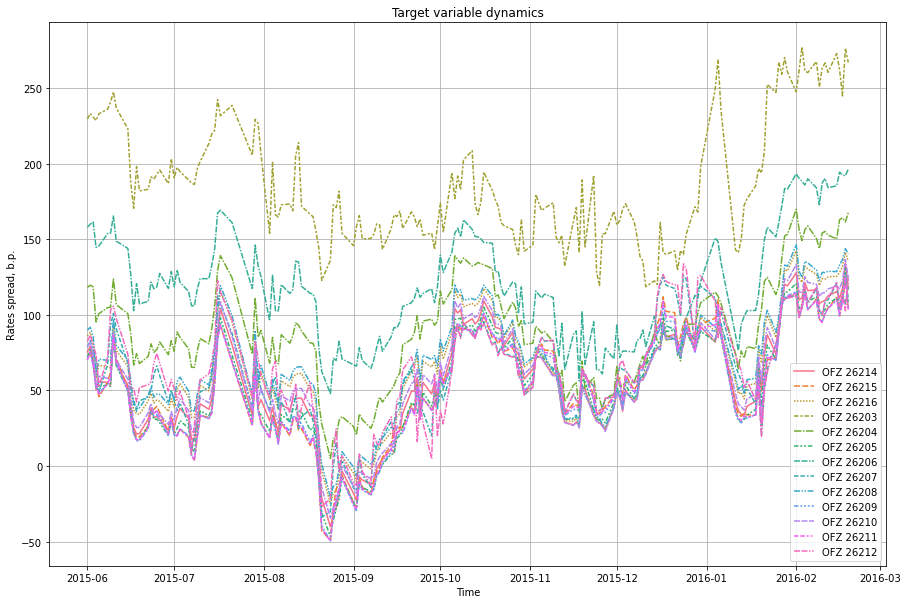

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Target variable dynamics')
plt.xlabel('Time')
plt.ylabel('Rates spread, b.p.')
sns.lineplot(data = true_target.drop(columns=['OFZ 26217', 'OFZ 26218']).loc['2015-06':])
plt.grid()
plt.savefig(os.path.join(base_path, 'graphs/target_var_dynamics.png'), dpi=300)

## Stationarity check

- Look only at train data

In [14]:
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

In [26]:
import warnings
warnings.filterwarnings('ignore')
p_vals_adf = [] #H0 - unit root --> non-stationary
p_vals_kpss = [] #H0 - stationary data
for bond in true_target.columns:
    ts = true_target.loc['2015-06-01':][bond].values
    p_vals_adf.append(adfuller(ts, regression='c', autolag='AIC')[1])
    p_vals_kpss.append(kpss(ts, regression='c',)[1]) #Actual p-value is smaller
res_ts = pd.DataFrame(zip(p_vals_adf, p_vals_kpss), index = true_target.columns, 
                      columns=['ADF test pval', 'KPSS test pval'])
res_ts.sort_index()

,ADF test pval,KPSS test pval
OFZ 26203,0.110009,0.100000
OFZ 26204,0.435200,0.100000
OFZ 26205,0.250671,0.023941
OFZ 26206,0.479650,0.100000
OFZ 26207,0.082688,0.024983
OFZ 26208,0.369683,0.072812
OFZ 26209,0.228201,0.019968
OFZ 26210,0.298415,0.041649
OFZ 26211,0.220897,0.018806
OFZ 26212,0.080140,0.040856


In [27]:
res_ts.sort_index().to_excel(os.path.join(base_path, 'stats/target_before_diff.xlsx'))

In [28]:
import warnings
warnings.filterwarnings('ignore')
p_vals_adf = [] #H0 - unit root --> non-stationary
p_vals_kpss = [] #H0 - stationary data
for bond in true_target.columns:
    ts = true_target.diff().loc['2015-06-01':][bond].values
    p_vals_adf.append(adfuller(ts, regression='c', autolag='AIC')[1])
    p_vals_kpss.append(kpss(ts, regression='c',)[1]) #Actual p-value is smaller
res_ts = pd.DataFrame(zip(p_vals_adf, p_vals_kpss), index = true_target.columns, 
                      columns=['ADF test pval', 'KPSS test pval'])
res_ts.sort_index()

,ADF test pval,KPSS test pval
OFZ 26203,5.214271e-29,0.1
OFZ 26204,2.549737e-28,0.1
OFZ 26205,5.080698e-26,0.1
OFZ 26206,4.855084e-30,0.1
OFZ 26207,1.730962e-26,0.1
OFZ 26208,1.980087e-27,0.1
OFZ 26209,8.405663e-25,0.1
OFZ 26210,3.113808e-27,0.1
OFZ 26211,1.860057e-24,0.1
OFZ 26212,5.895812e-29,0.1


In [29]:
res_ts.sort_index().to_excel(os.path.join(base_path, 'stats/target_after_diff.xlsx'))